# Lab Review -- Any Questions?

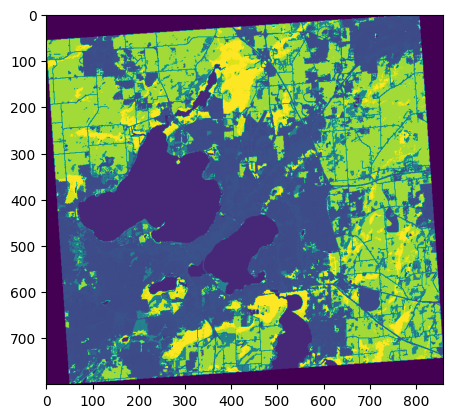

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd

land = rasterio.open("zip://../..//p6/land.zip!wi.tif")
# a = land.read()
window = gpd.GeoSeries([box(-89.5, 43, -89.2, 43.2)]).set_crs("epsg:4326").to_crs(land.crs)
plt.imshow(mask(land, window, crop=True)[0][0])

# Broadcast

In [2]:
v1 = np.array([1,2,3]).reshape(-1, 1)
v1

array([[1],
       [2],
       [3]])

In [3]:
v2 = np.array([4,5,6]).reshape(-1, 1)
v2

array([[4],
       [5],
       [6]])

In [4]:
v1 * v2 # 1*4, 2*5, 3*6

array([[ 4],
       [10],
       [18]])

In [5]:
v1 * v2.T # TODO: what in the world is going on here?

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [ ]:
# BROADCASTING: when we do elementwise operations
# one thing it does:
# "stretch" 1 => N along any dimension to make shapes compatible

In [6]:
v1.shape   # broadcast this to 3x3 (stretching the second dimension)

(3, 1)

In [7]:
v2.T.shape      # broadcast this to 3x3 (stretching the first dimension)

(1, 3)

In [8]:
v1

array([[1],
       [2],
       [3]])

In [11]:
v1_broadcast = np.concatenate([v1,v1,v1], axis=1)   # axis=1 is across
v1_broadcast

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [12]:
v2.T

array([[4, 5, 6]])

In [14]:
v2t_broadcast = np.concatenate([v2.T,v2.T,v2.T], axis=0)   # axis=0 is down
v2t_broadcast

array([[4, 5, 6],
       [4, 5, 6],
       [4, 5, 6]])

In [15]:
v1_broadcast * v2t_broadcast

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [19]:
digits = np.arange(1,11).reshape(-1,1)
digits

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [20]:
digits * digits.T

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

In [26]:
import pandas as pd

pd.DataFrame(digits * digits.T, columns=digits.reshape(-1), index=digits.reshape(-1))

,1,2,3,4,5,6,7,8,9,10
1,1,2,3,4,5,6,7,8,9,10
2,2,4,6,8,10,12,14,16,18,20
3,3,6,9,12,15,18,21,24,27,30
4,4,8,12,16,20,24,28,32,36,40
5,5,10,15,20,25,30,35,40,45,50
6,6,12,18,24,30,36,42,48,54,60
7,7,14,21,28,35,42,49,56,63,70
8,8,16,24,32,40,48,56,64,72,80
9,9,18,27,36,45,54,63,72,81,90
10,10,20,30,40,50,60,70,80,90,100


In [27]:
a = plt.imread("bug.jpg")
a.shape

(1688, 2521, 3)

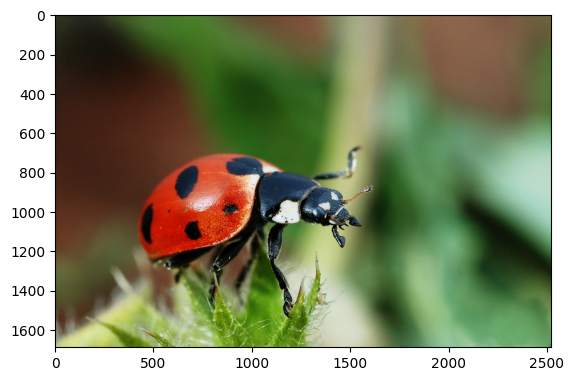

In [28]:
plt.imshow(a)

In [29]:
# GOAL: create a fade effect (full color on the left, to black on the right)
a.shape

(1688, 2521, 3)

In [33]:
fade = 1 - np.arange(2521) / 2521
print(fade.shape)
fade

(2521,)


array([1.00000000e+00, 9.99603332e-01, 9.99206664e-01, ...,
       1.19000397e-03, 7.93335978e-04, 3.96667989e-04])

In [34]:
a.shape

(1688, 2521, 3)

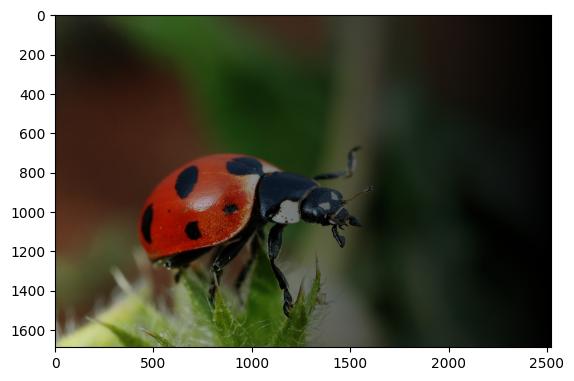

In [39]:
plt.imshow(a / 255.0 * fade.reshape(1, 2521, 1))

In [ ]:
# BROADCAST CAN:
# 1. stretch 1 => N
# 2. add dimensions of size 1 to the beginning of a shape

In [40]:
a.shape

(1688, 2521, 3)

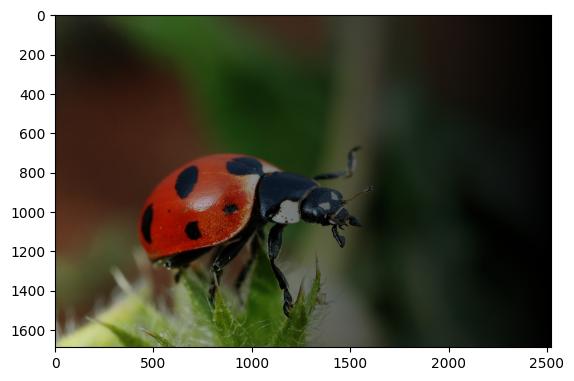

In [41]:
# BROADCAST: (2521, 1) => (1, 2521, 1) => (1688, 2521, 3)
plt.imshow(a / 255.0 * fade.reshape(2521, 1))

# Dot Product

In [42]:
v1

array([[1],
       [2],
       [3]])

In [43]:
v2

array([[4],
       [5],
       [6]])

In [44]:
v1 * v2   # 1*4, 2*5, 3*6

array([[ 4],
       [10],
       [18]])

In [45]:
# dot product, for now: horizontal vector DOT vertical vector

In [48]:
v1.T

array([[1, 2, 3]])

In [47]:
v2

array([[4],
       [5],
       [6]])

In [50]:
np.dot(v1.T, v2)   # 1*4 + 2*5 + 3*6

array([[32]])

In [51]:
v1.T @ v2

array([[32]])

In [52]:
(v1.T @ v2).item()   # pulls out the only number in the results

32

# Predicting with dot product

1. use case for dot product
2. one's column
3. matrix dot vector

$\begin{bmatrix}
1 & 2 \\ 3 & 4\\
\end{bmatrix}
\cdot
\begin{bmatrix}
10 \\ 1 \\
\end{bmatrix}$

In [53]:
import pandas as pd
import numpy as np

houses = pd.DataFrame([[2,1,1985],
                       [3,1,1998],
                       [4,3,2005],
                       [4,2,2020]],
                      columns=["beds", "baths", "year"])
houses

,beds,baths,year
0,2,1,1985
1,3,1,1998
2,4,3,2005
3,4,2,2020


In [56]:
# take row (as Series)
# return estimated price (in thousands)
def predict_price(house):
    return ((house["beds"]*42.3) + (house["baths"]*10) + 
            (house["year"]*1.67) - 3213)

predict_price(houses.iloc[0])

196.54999999999973

In [59]:
X = houses.values
X

array([[   2,    1, 1985],
       [   3,    1, 1998],
       [   4,    3, 2005],
       [   4,    2, 2020]])

In [62]:
house0 = X[0:1, :]
house0

array([[   2,    1, 1985]])

In [63]:
c = np.array([42.3, 10, 1.67]).reshape(-1, 1)
c

array([[42.3 ],
       [10.  ],
       [ 1.67]])

In [65]:
# horizontal @ vertical
house0 @ c - 3213

array([[196.55]])

In [66]:
c = np.array([42.3, 10, 1.67, -3213]).reshape(-1, 1)
c

array([[ 4.230e+01],
       [ 1.000e+01],
       [ 1.670e+00],
       [-3.213e+03]])

In [74]:
X = np.concatenate([X, np.ones(4).reshape(-1,1)], axis=1)
X

array([[2.000e+00, 1.000e+00, 1.985e+03, 1.000e+00],
       [3.000e+00, 1.000e+00, 1.998e+03, 1.000e+00],
       [4.000e+00, 3.000e+00, 2.005e+03, 1.000e+00],
       [4.000e+00, 2.000e+00, 2.020e+03, 1.000e+00]])

In [75]:
house0 = X[0:1, :]
house0

array([[2.000e+00, 1.000e+00, 1.985e+03, 1.000e+00]])

In [76]:
house0 @ c

array([[196.55]])

In [77]:
house0 = X[0:1, :]
house1 = X[1:2, :]
house2 = X[2:3, :]
house3 = X[3:4, :]
house3

array([[4.00e+00, 2.00e+00, 2.02e+03, 1.00e+00]])

In [78]:
print(house0 @ c)
print(house1 @ c)
print(house2 @ c)
print(house3 @ c)

[[196.55]]
[[260.56]]
[[334.55]]
[[349.6]]


In [80]:
# dot product: matrix of data(houses) DOT vertical vector (coef)
# loop over every row of data, dot product each with coefficients
X @ c

array([[196.55],
       [260.56],
       [334.55],
       [349.6 ]])

# Fitting with `np.linalg.solve`

**Above:** we estimated house prices using a linear model based on the dot product as follows:

$Xc = y$

* $X$ (known) is a matrix with house features (from DataFrame)
* $c$ (known) is a vector of coefficients (our model parameters)
* $y$ (computed) are the prices

**Below:** what if X and y are know, and we want to find c?

In [81]:
houses = pd.DataFrame([[2,1,1985,196.55],
                       [3,1,1998,260.56],
                       [4,3,2005,334.55],
                       [4,2,2020,349.60]],
                      columns=["beds", "baths", "year", "price"])
houses

,beds,baths,year,price
0,2,1,1985,196.55
1,3,1,1998,260.56
2,4,3,2005,334.55
3,4,2,2020,349.60


If we assume price is linearly based on the features, with this equation:

* $beds*c_0 + baths*c_1 + year*c_2 + 1*c_3 = price$

Then we get four equations:

* $2*c_0 + 1*c_1 + 1985*c_2 + 1*c_3 = 196.55$
* $3*c_0 + 1*c_1 + 1998*c_2 + 1*c_3 = 260.56$
* $4*c_0 + 3*c_1 + 2005*c_2 + 1*c_3 = 334.55$
* $4*c_0 + 2*c_1 + 2020*c_2 + 1*c_3 = 349.60$


In [83]:
houses["ones"] = 1
houses

,beds,baths,year,price,ones
0,2,1,1985,196.55,1
1,3,1,1998,260.56,1
2,4,3,2005,334.55,1
3,4,2,2020,349.60,1


In [86]:
X = houses[["beds", "baths", "year", "ones"]].values
X

array([[   2,    1, 1985,    1],
       [   3,    1, 1998,    1],
       [   4,    3, 2005,    1],
       [   4,    2, 2020,    1]])

In [87]:
y = houses[["price"]].values
y

array([[196.55],
       [260.56],
       [334.55],
       [349.6 ]])

In [88]:
c = np.linalg.solve(X, y)
c

array([[ 4.230e+01],
       [ 1.000e+01],
       [ 1.670e+00],
       [-3.213e+03]])

In [89]:
X @ c

array([[196.55],
       [260.56],
       [334.55],
       [349.6 ]])

In [90]:
dream_house = np.array([[13, 13, 2022, 1]])
dream_house

array([[  13,   13, 2022,    1]])

In [91]:
dream_house @ c

array([[843.64]])

# Two Perspectives on `Matrix @ vector`

$\begin{bmatrix}
4&5\\6&7\\8&9\\
\end{bmatrix}
\cdot
\begin{bmatrix}
2\\3\\
\end{bmatrix}
= ????
$

In [27]:
X = np.array([[4,5], [6,7], [8,9]])
c = np.array([2, 3]).reshape(-1,1)
X @ c

array([[23],
       [33],
       [43]])

## Row Picture

Do dot product one row at a time.

$\begin{bmatrix}
4&5\\6&7\\8&9\\
\end{bmatrix}
\cdot
\begin{bmatrix}
2\\3\\
\end{bmatrix}
=
\begin{bmatrix}
(4*2)+(5*3)\\
(6*2)+(7*3)\\
(8*2)+(9*3)\\
\end{bmatrix}
=
\begin{bmatrix}
23\\
33\\
43\\
\end{bmatrix}
$

## Column Picture

$\begin{bmatrix}
c_0&c_1&c_2\\
\end{bmatrix}
\cdot
\begin{bmatrix}
x\\y\\z\\
\end{bmatrix}
=(c_0*x) + (c_1*y) + (c_2*z)
$

Dot product takes a **linear combination** of columns.

$\begin{bmatrix}
4&5\\6&7\\8&9\\
\end{bmatrix}
\cdot
\begin{bmatrix}
2\\3\\
\end{bmatrix}
=
\begin{bmatrix}
4\\6\\8\\
\end{bmatrix}*2
+
\begin{bmatrix}
5\\7\\9\\
\end{bmatrix}*3
=
\begin{bmatrix}
23\\
33\\
43\\
\end{bmatrix}
$